In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Завдання 1. Завантажити набір даних.

In [3]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

Завдання 2. Розділити дані на тренувальний та тестовий набори.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Завдання 3. Застосувати SVM і Random Forest для визначення важливих ознак.

In [5]:
svm = SVC(kernel='linear', C=1, probability=True)
svm.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importance_rf = rf.feature_importances_
importance_svm = np.abs(svm.coef_[0])

Завдання 4. Побудувати графік або таблицю, щоб показати важливість кожної ознаки в аналізі.

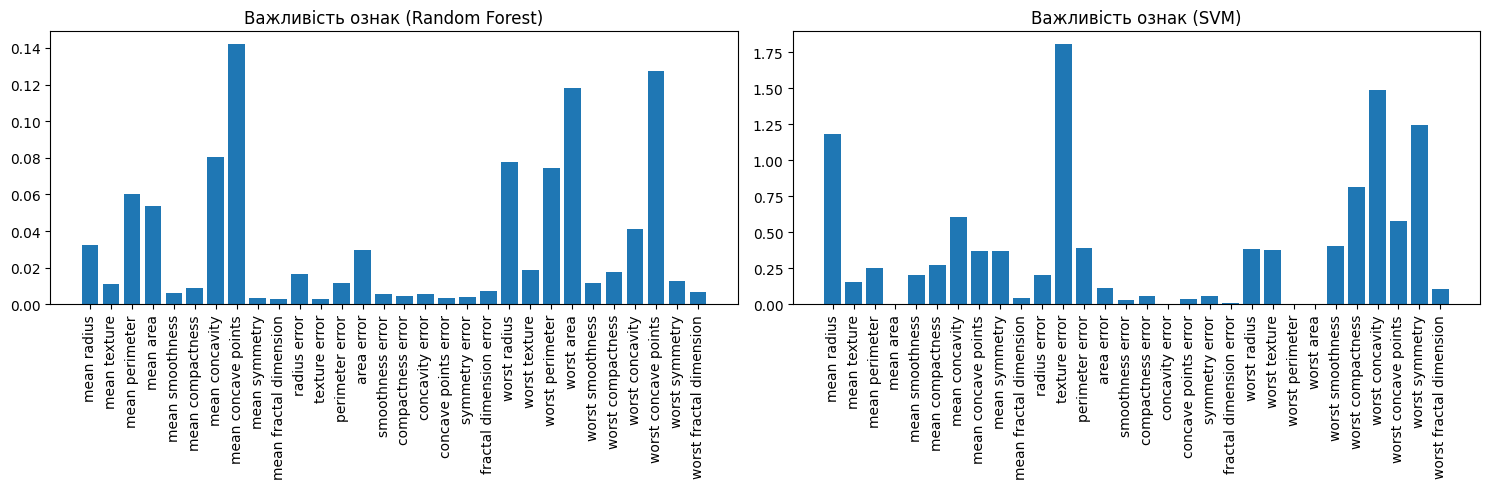

In [6]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(cancer.feature_names, importance_rf)
plt.title('Важливість ознак (Random Forest)')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(cancer.feature_names, importance_svm)
plt.title('Важливість ознак (SVM)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Завдання 5. Обговорити результати та визначити, які ознаки найбільше впливають на вихідні дані.

In [7]:
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Точність Random Forest: {accuracy_rf:.2f}")
print(f"Точність SVM: {accuracy_svm:.2f}")

Точність Random Forest: 0.97
Точність SVM: 0.96


Завдання 6. Обчислити точність для двох алгоритмів і порівняти результати

In [9]:
if accuracy_svm > accuracy_rf:
    print("SVM показав кращу точність за Random Forest.")
elif accuracy_svm < accuracy_rf:
    print("Random Forest показав кращу точність за SVM.")
else:
    print("Точність алгоритмів однакова.")

Random Forest показав кращу точність за SVM.
